### Praca z danymi nieustrukturyzowanymi VI

Czasami nie wystarczy uderzyć na stronę. Czasami zanim dane będą dostępne na stronie musimy coś na tej stronie zrobić. Popatrzmy na przykład.

In [4]:
import requests
from bs4 import BeautifulSoup

url = "https://www.imdb.com/chart/top/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36 Edg/131.0.0.0"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text)

movies = soup.find_all(class_="ipc-title__text")
for movie in movies:
    print(movie.text.strip())

IMDb Charts
IMDb Top 250 Movies
1. Skazani na Shawshank
2. Ojciec chrzestny
3. Mroczny Rycerz
4. Ojciec chrzestny II
5. 12 gniewnych ludzi
6. Władca Pierścieni: Powrót króla
7. Lista Schindlera
8. Pulp Fiction
9. Władca Pierścieni: Drużyna Pierścienia
10. Dobry, zły i brzydki
11. Forrest Gump
12. Władca Pierścieni: Dwie wieże
13. Podziemny krąg
14. Incepcja
15. Gwiezdne wojny: Część V - Imperium kontratakuje
16. Matrix
17. Chłopcy z ferajny
18. Lot nad kukułczym gniazdem
19. Interstellar
20. Siedem
21. To wspaniałe życie
22. Siedmiu samurajów
23. Milczenie owiec
24. Szeregowiec Ryan
25. Miasto Boga
Recently viewed


Ładuje się pierwszych 20 stron. Reszta jest dołączana asynchronicznie javascriptem po kliknięciu przycisku Load more i skrolowaniu w dół. W jaki sposób moglibyśmy pobrać te informacje z poziomu Pythona?

Będziemy potrzebowali kolejnego narzędzia. Najlepiej, żeby był to emulator przeglądarki w pełni kontrolowany z poziomu pythona. Tak, zebyśmy mogli w pythonie wydawać polecenia postaci: nacinij ten przycisk, przeskroluj w dół, ... Czy istnieje takie narzędzie ?

Tak, najpopularniejszym obecnie tego typu rozwiązaniem jest [Selenium](https://www.selenium.dev/)

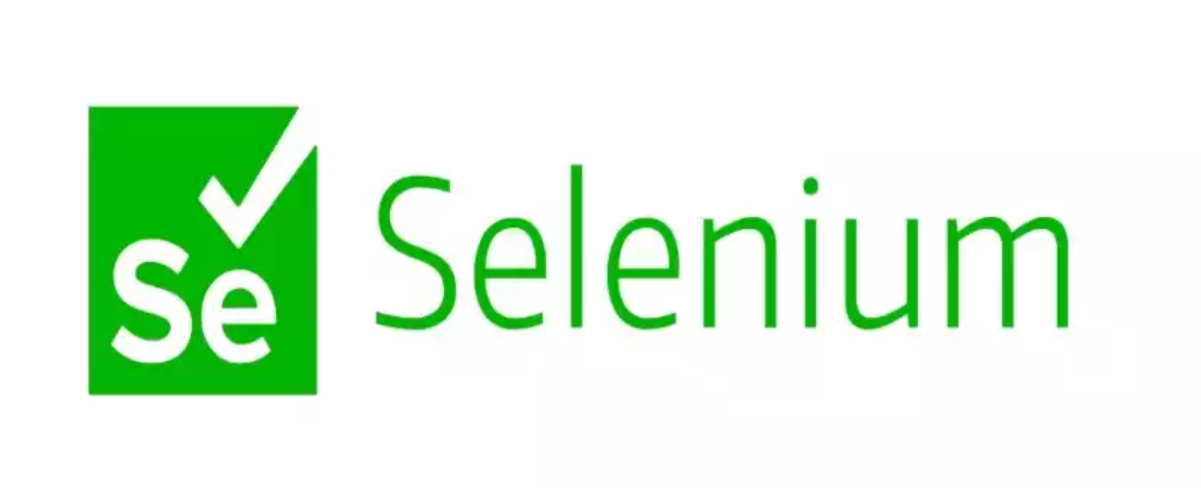

Selenium jest projektem automatyzacji wszystkich czynności jakie można wykonywać w przeglądarce. W ramach tego projektu powstało wiele narzędzi. 

Jednym z najczęstszych przypadków użycie Selenium jest testowanie frontendu (ui/ux) aplikacji webowych. Silnik pozwala nam na pisanie skryptów, które realizują określone scenarusze testowe wewnątrz przegląrdki uruchomionej w specjalnym trybie. Innym zastosowaniem Selenimu jest właśnie webscrapping. Przydatny jest w przypadkach kiedy struktura strony wymaga od nas większej interakcji, kiedy w wyniku wykonanych operacji dynamicznie, za pomocą skryptów javascript doładowywane są jakieś informacje na stronie. Bez Selenium zmuszeni bylibyśmy analizować skrypty js uruchamiane na stronie i symulować ich działanie w pythonie (przed czym portale mogą też zabezpieczyć się na różne sposoby). Więcej można poczytać na stronie z [dokumentacją](https://www.selenium.dev/documentation/)

Python posiada bibliotekę o tej samej nazwie [selenium](https://selenium-python.readthedocs.io/installation.html#introduction), która służy do komunikacji z Selenium.

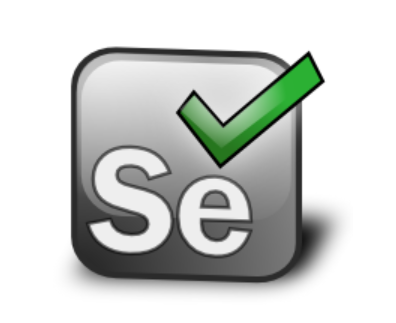

Selenium do działania wymaga tzw. WebDrivera pod konkretną przeglądarkę (Firefox, Chrome, Opera, ...). Jest to interfejs za pośrednictwem którego wydajemy komendy przeglądarce.

#### 1. Instalacja Selenium

Do uruchomienia przelądarki z poziomu pythona potrzebujemy zrobić dwie rzeczy:
- zainstalować webdriver do odpowiedniej przeglądarki

  https://selenium-python.readthedocs.io/installation.html#drivers - pobrany webdriver należy umieścić w miejscu, w którym znajdować się będzie nasz pythonowy skrypt.
  
- zainstalować bibliotekę selenium

  `pip install selenium`

Po wykonaniu tych czynności sprobujmy napisać najprostszy możliwy skrypt, który otworzy wskazaną stronę w oknie przeglądarki.

In [ ]:
!pip install selenium

In [10]:
from selenium import webdriver

dir(webdriver)

['ActionChains',
 'Chrome',
 'ChromeOptions',
 'ChromeService',
 'ChromiumEdge',
 'DesiredCapabilities',
 'Edge',
 'EdgeOptions',
 'EdgeService',
 'Firefox',
 'FirefoxOptions',
 'FirefoxProfile',
 'FirefoxService',
 'Ie',
 'IeOptions',
 'IeService',
 'Keys',
 'Proxy',
 'Remote',
 'Safari',
 'SafariOptions',
 'SafariService',
 'WPEWebKit',
 'WPEWebKitOptions',
 'WPEWebKitService',
 'WebKitGTK',
 'WebKitGTKOptions',
 'WebKitGTKService',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'chrome',
 'chromium',
 'common',
 'edge',
 'firefox',
 'ie',
 'remote',
 'safari',
 'support',
 'webkitgtk',
 'wpewebkit']

In [60]:
driver = webdriver.Edge()

In [12]:
url = "https://www.python.org/"
driver.get(url)

Jak scrapować z poziomu selenium?

Co potrafi drvier?

In [14]:
print(dir(driver))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_authenticator_id', '_check_if_window_handle_is_current', '_fedcm', '_file_detector', '_get_cdp_details', '_is_remote', '_mobile', '_require_fedcm_support', '_script', '_shadowroot_cls', '_start_bidi', '_switch_to', '_unwrap_value', '_web_element_cls', '_websocket_connection', '_wrap_value', 'add_cookie', 'add_credential', 'add_virtual_authenticator', 'back', 'bidi_connection', 'capabilities', 'caps', 'close', 'command_executor', 'create_web_element', 'current_url', 'current_window_handle', 'delete_all_cookies', 'delete_cookie', 'delete_downloadable_files', 'delete_netwo

In [15]:
from selenium.webdriver.common.by import By

elem = driver.find_element(By.NAME, "q")
elem

<selenium.webdriver.remote.webelement.WebElement (session="700fd148137d1e2a729f6c0989df4539", element="f.418BF9BF00CE604CBAAC6C51DA2F99C0.d.4FA87915D97B869B3D0C7DDCAC7B7BED.e.6")>

In [17]:
print(dir(elem))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_execute', '_id', '_parent', '_upload', 'accessible_name', 'aria_role', 'clear', 'click', 'find_element', 'find_elements', 'get_attribute', 'get_dom_attribute', 'get_property', 'id', 'is_displayed', 'is_enabled', 'is_selected', 'location', 'location_once_scrolled_into_view', 'parent', 'rect', 'screenshot', 'screenshot_as_base64', 'screenshot_as_png', 'send_keys', 'shadow_root', 'size', 'submit', 'tag_name', 'text', 'value_of_css_property']


In [18]:
elem.tag_name

'input'

In [19]:
elem.text

''

In [20]:
elem.get_attribute("role")

'textbox'

In [23]:
elem.get_property("value")

'ala'

In [24]:
elem.get_attribute?

##### Attributes vs properties

Atrybuty są określone w kodzie źródłowym html, natomiast property są wartościami zapisanymi w pamięci ram (w DOM).

Ok, a o co możemy wypytywać?

In [26]:
print(dir(By))

['CLASS_NAME', 'CSS_SELECTOR', 'ID', 'LINK_TEXT', 'NAME', 'PARTIAL_LINK_TEXT', 'TAG_NAME', 'XPATH', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_custom_finders', 'clear_custom_finders', 'get_finder', 'register_custom_finder']


In [27]:
elem = driver.find_element(By.CLASS_NAME, "jump-link")
elem.text

'▼ Close'

Jakie mamy popularne property?

In [28]:
elem.get_attribute("outerHTML")

'<a id="close-python-network" class="jump-link" href="#python-network" aria-hidden="true">\n                    <span aria-hidden="true" class="icon-arrow-down"><span>▼</span></span> Close\n                </a>'

In [30]:
elem.get_attribute("innerHTML").strip()

'<span aria-hidden="true" class="icon-arrow-down"><span>▼</span></span> Close'

In [31]:
elem.get_attribute("textContent").strip()

'▼ Close'

Jak to oczyścić?

Weźmy jakiś button

In [34]:
button = driver.find_element(By.ID, "submit")
button

<selenium.webdriver.remote.webelement.WebElement (session="700fd148137d1e2a729f6c0989df4539", element="f.418BF9BF00CE604CBAAC6C51DA2F99C0.d.5874A3D723F1506BE8181D9D40E7198C.e.26685")>

Kliknijmy w niego.

In [35]:
button.click()

Ok, na tej stronie nie ma nic ciekawego. Jak wrócić?

In [37]:
driver.back()

Mamy też kontrolę nad wysyłaniem sygnałów z peryferiów. Spójrzmy.

In [38]:
from selenium.webdriver.common.keys import Keys

In [39]:
print(dir(Keys))

['ADD', 'ALT', 'ARROW_DOWN', 'ARROW_LEFT', 'ARROW_RIGHT', 'ARROW_UP', 'BACKSPACE', 'BACK_SPACE', 'CANCEL', 'CLEAR', 'COMMAND', 'CONTROL', 'DECIMAL', 'DELETE', 'DIVIDE', 'DOWN', 'END', 'ENTER', 'EQUALS', 'ESCAPE', 'F1', 'F10', 'F11', 'F12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'HELP', 'HOME', 'INSERT', 'LEFT', 'LEFT_ALT', 'LEFT_CONTROL', 'LEFT_SHIFT', 'META', 'MULTIPLY', 'NULL', 'NUMPAD0', 'NUMPAD1', 'NUMPAD2', 'NUMPAD3', 'NUMPAD4', 'NUMPAD5', 'NUMPAD6', 'NUMPAD7', 'NUMPAD8', 'NUMPAD9', 'PAGE_DOWN', 'PAGE_UP', 'PAUSE', 'RETURN', 'RIGHT', 'SEMICOLON', 'SEPARATOR', 'SHIFT', 'SPACE', 'SUBTRACT', 'TAB', 'UP', 'ZENKAKU_HANKAKU', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__'

Spróbujmy wpisać coś w formularz i dopiero kliknąć w przycisk Go.

In [43]:
# bierzemy input formularza
input_field = driver.find_element(By.ID, "id-search-field")

In [44]:
# wyślijmy do niego sekwencje znaków
input_field.send_keys("requests")

In [45]:
# i klikamy
button = driver.find_element(By.ID, "submit")
button.click()

Wyniki są nisko. Możemy się przeskrolować ?

Tak, ale wymaga to dwóch dodatkowych linijek, ponieważ sygnały z myszki są dostępne dopiero z poziomu obiektu klasy `ActionChains` - interfejsu stworzonego do obsługi bardziej złożonych scenariuszy, kiedy do wykonania mamy sekwencję czynności takich jak skrolowanie, klikanie, przeciąganie (drag and drop), ...

In [47]:
from selenium.webdriver.common.action_chains import ActionChains

actions = ActionChains(driver)
dir(actions)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_driver',
 'click',
 'click_and_hold',
 'context_click',
 'double_click',
 'drag_and_drop',
 'drag_and_drop_by_offset',
 'key_down',
 'key_up',
 'move_by_offset',
 'move_to_element',
 'move_to_element_with_offset',
 'pause',
 'perform',
 'release',
 'reset_actions',
 'scroll_by_amount',
 'scroll_from_origin',
 'scroll_to_element',
 'send_keys',
 'send_keys_to_element',
 'w3c_actions']

Przeskrolujmy się w dół o 1000 pikseli.

In [48]:
actions.scroll_by_amount(0, 1000)  # x, y

Dlaczego `perform` na końcu?

Ponieważ klasa ActionChains implementuje tzw. `fluent interface` jej metody mogą być łańcuchowane. Wszystkie zostaną wykonane sekwencyjnie dopiero po wywołaniu metody `perform`.

In [49]:
actions.perform()

Znajdźmy pierwsze wystąpienie słowa requests w wynikach.

In [50]:
elem = driver.find_element(By.CSS_SELECTOR, "p > span.highlighted")
elem

<selenium.webdriver.remote.webelement.WebElement (session="700fd148137d1e2a729f6c0989df4539", element="f.418BF9BF00CE604CBAAC6C51DA2F99C0.d.E59C3F2595D319B1A1C2FE09FA006C2E.e.39074")>

In [51]:
elem.get_attribute("outerHTML")

'<span class="highlighted">Requests</span>'

Kliknijmy w nie i przytrzymajmy

In [52]:
actions.click_and_hold(elem)

Przesuńmy kursor myszy o 150 pikseli w dół.

In [54]:
actions.move_by_offset(0, 150)

Zwalniamy click

In [55]:
actions.release()

A teraz wykonajmy całą tą sekwencję

In [56]:
actions.perform()

W ten sposób zaznaczyliśmy tekst o wysokości 150px/

Selenium jest wyposażone w potężny zestaw narzędzi do automatyzacji operacji w przeglądarce. A jeżeli nawet nie znajdziemy tego co jest potrzebne, to zawsze możemy wykonać na stronie swój skrypt js.

In [57]:
driver.execute_script("alert('Hello, world!');")

Wracamy

In [58]:
driver.back()

Ze zdobytymi informacjami, przykład z początku rozdziału nie powienien już stanowić dla nas większego wyzwania.

In [61]:
url = "https://yougov.co.uk/ratings/politics/popularity/charities-organisations/all"

driver.get(url)

Klikamy w przycisk Accept

In [62]:
elem = driver.find_element(By.ID, "onetrust-accept-btn-handler")
elem.click()

Klikamy w przycisk Load More

In [64]:
elem = driver.find_element(By.NAME, "rankings-load-more-entities")
elem.click()

No i teraz skrolujemy dopóki nie dotrzemy do końca. Tylko jak to zrobić?

Jest kilka sposobów. Jednym z najprostszym jest skrolowanie w pętli dopóty dopóki wysokość strony się zmienia. Jeżeli przy kolejnych skrolowaniach wysokość strony nie ulega już zmianie (ponieważ nie są ładowane już żadne nowe treści) oznacza to, że dotarlismy do końca strony.

In [66]:
from selenium.webdriver.common.action_chains import ActionChains

actions = ActionChains(driver)

I teraz, kiedy mamy już wczytane wszystkie dane pozostje zrobić scraping.

In [90]:
import time
import random

last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    print(f"Aktualna wysokość okna skrolowania {last_height}")
    actions.scroll_by_amount(0, 2500).perform()
    time.sleep(5 + random.random())

    new_height = driver.execute_script("return document.body.scrollHeight")
    print(f"Nowa wysokość {new_height}")
    if new_height == last_height:
        break
    else:
        last_height = new_height


Aktualna wysokość okna skrolowania 7169
Nowa wysokość 9169
Aktualna wysokość okna skrolowania 9169
Nowa wysokość 11169
Aktualna wysokość okna skrolowania 11169
Nowa wysokość 13169
Aktualna wysokość okna skrolowania 13169
Nowa wysokość 15169
Aktualna wysokość okna skrolowania 15169
Nowa wysokość 16869
Aktualna wysokość okna skrolowania 16869
Nowa wysokość 16869


Co możemy z tym zrobić ?

Zapisać do pliku, np. w formacie csv.

In [95]:
foundations = driver.find_elements(By.CSS_SELECTOR, "a.rankings-entities-list-item")

for idx, foundation in enumerate(foundations, start=1):
    name = foundation.find_element(By.CLASS_NAME,"entity-name").text
    popularity = foundation.find_element(By.CLASS_NAME, "rankings-item-active").find_element(By.TAG_NAME, "span").text

    print(f"{idx}. {name} [{popularity}]")

1. St. John Ambulance [89%]
2. British Heart Foundation [86%]
3. Cancer Research UK [84%]
4. Great Ormond Street Hospital [83%]
5. Alzheimer's Research UK [82%]
6. Samaritans [81%]
7. Alzheimer's Society [80%]
8. Guide Dogs [80%]
9. Mind [80%]
10. Marie Curie [79%]
11. Battersea [78%]
12. British Red Cross [78%]
13. Dementia UK [78%]
14. WWF [77%]
15. Macmillan Cancer Support [77%]
16. Prostate Cancer UK [77%]
17. National Trust [76%]
18. Royal British Legion [75%]
19. RSPCA [74%]
20. Duke of Edinburgh Awards [73%]
21. Alzheimer's Association [73%]
22. Dogs Trust [73%]
23. Keep Britain Tidy [72%]
24. Help for Heroes [72%]
25. Save the Children [71%]
26. NSPCC [71%]
27. RSPB [70%]
28. Age UK [68%]
29. Woodland Trust [68%]
30. RNLI Lifeboats [68%]
31. Diabetes UK [68%]
32. Princes Trust [68%]
33. London's Air Ambulance [67%]
34. Salvation Army [67%]
35. Children in Need [67%]
36. Parkinson's UK [66%]
37. Barnardo's [66%]
38. Comic Relief [66%]
39. UNICEF [66%]
40. Shelter [66%]
41. Bowel

In [97]:
import time
import random

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains

driver = webdriver.Edge()

url = "https://yougov.co.uk/ratings/politics/popularity/charities-organisations/all"
driver.get(url)

elem = driver.find_element(By.ID, "onetrust-accept-btn-handler")
elem.click()
time.sleep(2)

elem = driver.find_element(By.NAME, "rankings-load-more-entities")
elem.click()
time.sleep(2)

actions = ActionChains(driver)

last_height = driver.execute_script("return document.body.scrollHeight")

# scrolling
while True:
    print(f"Aktualna wysokość okna skrolowania {last_height}")
    actions.scroll_by_amount(0, 200).perform()
    time.sleep(2 + random.random())

    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height > last_height:
        break


last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    print(f"Aktualna wysokość okna skrolowania {last_height}")
    actions.scroll_by_amount(0, 2500).perform()
    time.sleep(3 + random.random())

    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    else:
        last_height = new_height

# scraping
foundations = driver.find_elements(By.CSS_SELECTOR, "a.rankings-entities-list-item")

for idx, foundation in enumerate(foundations, start=1):
    name = foundation.find_element(By.CLASS_NAME,"entity-name").text
    popularity = foundation.find_element(By.CLASS_NAME, "rankings-item-active").find_element(By.TAG_NAME, "span").text

    print(f"{idx}. {name} [{popularity}]")

Aktualna wysokość okna skrolowania 5336
Aktualna wysokość okna skrolowania 5336
Aktualna wysokość okna skrolowania 5336
Aktualna wysokość okna skrolowania 5336
Aktualna wysokość okna skrolowania 5336
Aktualna wysokość okna skrolowania 5336
Aktualna wysokość okna skrolowania 5336
Aktualna wysokość okna skrolowania 5336
Aktualna wysokość okna skrolowania 5336
Aktualna wysokość okna skrolowania 5336
Aktualna wysokość okna skrolowania 7336
Aktualna wysokość okna skrolowania 9336
1. St. John Ambulance [89%]
2. British Heart Foundation [86%]
3. Cancer Research UK [84%]
4. Great Ormond Street Hospital [83%]
5. Alzheimer's Research UK [82%]
6. Samaritans [81%]
7. Alzheimer's Society [80%]
8. Guide Dogs [80%]
9. Mind [80%]
10. Marie Curie [79%]
11. Battersea [78%]
12. British Red Cross [78%]
13. Dementia UK [78%]
14. WWF [77%]
15. Macmillan Cancer Support [77%]
16. Prostate Cancer UK [77%]
17. National Trust [76%]
18. Royal British Legion [75%]
19. RSPCA [74%]
20. Duke of Edinburgh Awards [73%]